In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score


In [260]:
train  = pd.read_csv('Real_Train_chr_data.csv')
test = pd.read_csv('Real_Test_chr_data.csv')

In [261]:
y = train['donr']
X = train.drop(['donr', 'Unnamed: 0'], axis = 1).set_index('ID')

In [262]:
X['chld2'] = [np.sqrt(x) for x in X['chld'].values]
X['wrat2'] = [np.sqrt(x) for x in X['wrat'].values]
X = X.drop('chld',axis=1)
X = X.drop('wrat',axis =1)
test['chld2'] = [np.sqrt(x) for x in test['chld'].values]
test['wrat2'] = [np.sqrt(x) for x in test['wrat'].values]
test = test.drop('chld',axis=1)
test = test.drop('wrat',axis =1)
X.head()

,reg1,reg2,reg3,reg4,home,hinc,genf,avhv,incm,inca,plow,npro,tgif,lgif,rgif,tdon,tlag,agif,chld2,wrat2
ID,,,,,,,,,,,,,,,,,,,,
1836,0,0,0,0,1,4,1,123,29,39,16,113,182,17,9,21,14,12.77,1.414214,2.449490
6494,0,0,0,1,1,4,0,147,19,46,27,87,133,37,18,19,5,16.97,1.732051,0.000000
113,0,1,0,0,1,2,0,221,118,118,1,117,424,11,9,20,3,12.73,2.000000,2.645751
2487,0,0,0,0,1,4,1,166,28,41,21,97,304,18,27,10,6,17.13,1.000000,2.449490
2153,0,1,0,0,1,7,1,184,53,53,15,116,192,114,23,24,12,17.57,0.000000,2.828427


In [263]:
train.nunique()

Unnamed: 0    3218
ID            4201
reg1             2
reg2             2
reg3             2
reg4             2
home             2
chld             6
hinc             7
genf             2
wrat            10
avhv           381
incm           152
inca           156
plow            77
npro           150
tgif           362
lgif           168
rgif            86
tdon            35
tlag            30
agif          1789
donr             2
dtype: int64

In [264]:
X[feat_1].head

<bound method NDFrame.head of       reg1  reg2  reg3  reg4  home     chld2  hinc  genf     wrat2  avhv  \
ID                                                                         
1836     0     0     0     0     1  1.414214     4     1  2.449490   123   
6494     0     0     0     1     1  1.732051     4     0  0.000000   147   
113      0     1     0     0     1  2.000000     2     0  2.645751   221   
2487     0     0     0     0     1  1.000000     4     1  2.449490   166   
2153     0     1     0     0     1  0.000000     7     1  2.828427   184   
...    ...   ...   ...   ...   ...       ...   ...   ...       ...   ...   
7561     0     0     0     1     1  2.000000     3     0  3.000000   185   
4762     0     1     0     0     1  1.414214     4     0  2.828427   180   
4872     1     0     0     0     1  0.000000     4     1  2.828427   234   
5528     0     1     0     0     1  1.000000     5     1  2.828427   128   
1711     0     0     0     0     0  1.414214     4     0  

In [265]:
feat = ['reg1', 'reg2', 'reg3', 'reg4', 'home', 'chld',
       'hinc', 'genf', 'wrat', 'avhv', 'incm', 'inca', 'plow', 'npro', 'tgif',
       'lgif', 'rgif', 'tdon', 'tlag', 'agif']
feat_1 = ['reg1', 'reg2', 'reg3', 'reg4', 'home', 'chld2',
       'hinc', 'genf', 'wrat2', 'avhv', 'plow', 'npro',
       'lgif', 'tdon', 'tlag', 'agif']

In [269]:
result = X[feat_1]

           reg1      reg2      reg3      reg4      home     chld2      hinc  \
reg1   1.000000 -0.363011 -0.185071 -0.196683  0.000627 -0.050008 -0.001800   
reg2  -0.363011  1.000000 -0.270419 -0.287386  0.015165  0.012630  0.006475   
reg3  -0.185071 -0.270419  1.000000 -0.146516 -0.011988 -0.015619 -0.025929   
reg4  -0.196683 -0.287386 -0.146516  1.000000  0.004844  0.015119  0.001656   
home   0.000627  0.015165 -0.011988  0.004844  1.000000 -0.098323  0.010875   
chld2 -0.050008  0.012630 -0.015619  0.015119 -0.098323  1.000000  0.010165   
hinc  -0.001800  0.006475 -0.025929  0.001656  0.010875  0.010165  1.000000   
genf   0.012166  0.009674 -0.010361  0.010516 -0.008402  0.023389  0.025054   
wrat2 -0.018976  0.042561 -0.006116 -0.052452  0.067185 -0.064493  0.016701   
avhv   0.015903  0.000537 -0.001258 -0.023644  0.056803  0.010759  0.004956   
plow  -0.023068 -0.005375  0.003272  0.019444 -0.048515  0.008028 -0.020391   
npro   0.014727 -0.013401 -0.012891 -0.000311  0.040

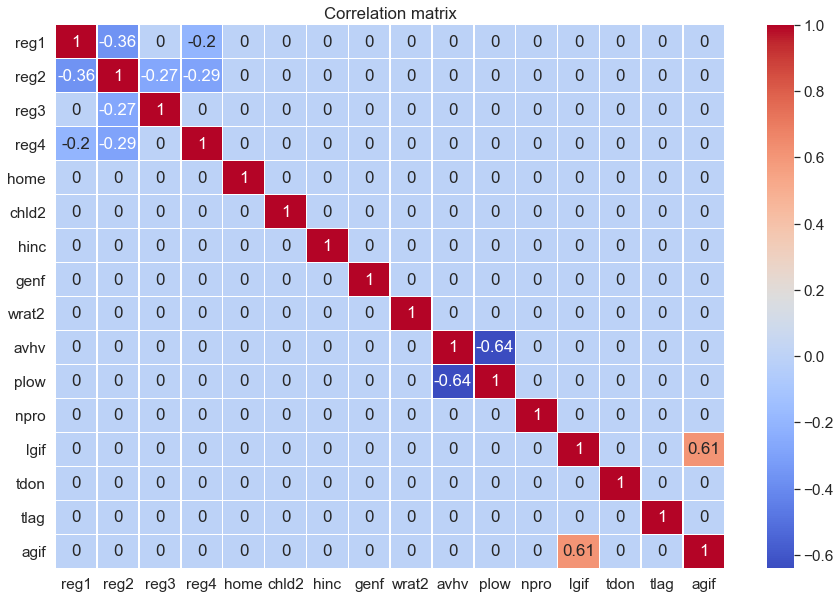

In [270]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = result.corr()
print(result.corr())
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [271]:
regr = linear_model.LogisticRegression(random_state=0)
regr1 =  RandomForestRegressor(n_estimators=80,
                               oob_score=True,
                               random_state=1)

In [272]:
X_1 = X[feat_1]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

In [274]:
regr1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80, oob_score=True, random_state=1)

In [275]:
y_pred = regr1.predict(X_test)

In [276]:
for i in range(len(y_pred)):
    if y_pred[i] <= 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

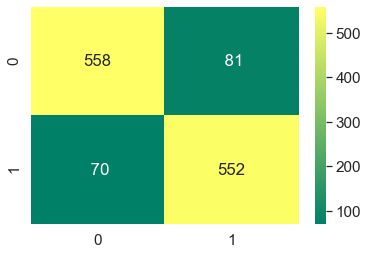

In [277]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")

In [278]:
f1_score(y_test, y_pred)

0.8796812749003984

In [281]:
fin_mod = RandomForestRegressor(n_estimators=80,
                               oob_score=True,
                               random_state=1)
fin_mod.fit(X_1, y)

RandomForestRegressor(n_estimators=80, oob_score=True, random_state=1)

In [285]:
y_fin = fin_mod.predict(test[feat_1])
for i in range(len(y_fin)):
    if y_fin[i] <= 0.5:
        y_fin[i] = 0
    else:
        y_fin[i] = 1

In [286]:
y_fin_df = pd.DataFrame(y_fin, columns=['donr'])

In [287]:
y_fin_df.head()

,donr
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [288]:

filename = '201227_Kugushev_2.csv'
y_fin_df.to_csv(filename, index=None)